# Lecture 11: Regresión Lineal

# 1. Introducción

Una **regresión lineal** es un modelo matemático que se utiliza para aproximar la relación **lineal** de dependencia entre una variable dependiente $Y$, unas variables independientes, $X_i$, y un término de error $\varepsilon$. Es decir, es un modelo que se puede representar de la siguiente manera:

$$ Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_m x_m + \varepsilon $$

En términos generales, podríamos escribirlo de forma sintética a partir de notación matricial, tal que

$$ Y = X\beta + \varepsilon $$

Donde $Y$, $\beta$ y $\varepsilon$ son vectores y $X$ es una matriz.

## 1.1. Valor esperado condicional: no todo es lo que parece

En términos generales, una regresión es una aproximación a la media condicional. Es decir,

$$ Y_i = E(Y|X_i) + \varepsilon_i $$

Eso significa que intentamos observar $Y$ con unas variables de control que observamos. Sin embargo, **por lo general existe un valor $\varepsilon$ no observable**. Este se llama **error estocástico** o **perturbación**.

Sin embargo, el método que comunmente se utiliza, los  **Mínimos Cuadrados Ordinarios (MCO)**, tiene como propiedad ser **insesgado**. Es decir, que encuentra de una manera loable el valor verdadero del estimador.

Es decir, ocurre que

$$ E(\hat{\beta}_1|X_i) \sim \beta_1 $$

Sin embargo, para que una regresión sea insesgada, se requieren dos condiciones principales:

1. **Exogeneidad estricta:** el valor esperado del error estocástico debe ser cero.

$$E(\varepsilon_i) = 0$$

2. **Ley de los Grandes Números:** debe haber una muestra lo suficientemente grande. Este es una condición más práctica.

Pongamos un ejemplo:

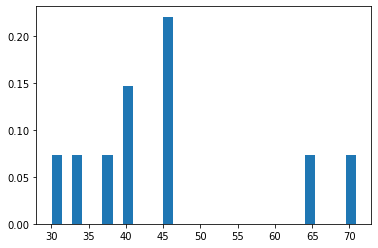

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

x = np.random.normal(loc = 50, scale = 10, size = 10)
e = np.random.normal(loc = 0, scale = 15, size = 10)

plt.hist(x, 30, density = True)
plt.show()

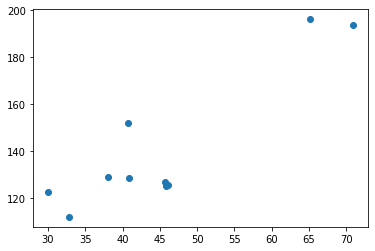

In [2]:
data = pd.DataFrame(x, e).reset_index()
data.rename(columns = {"index": "e", 0: "x"}, inplace = True)

data["y"] = 50 + 2*x + e

plt.scatter(data.x, data.y)
plt.show()

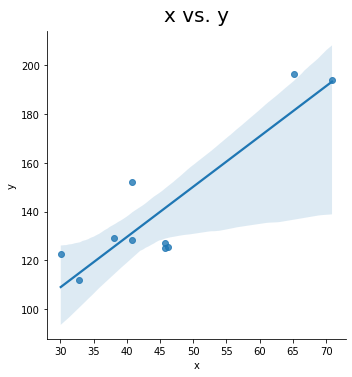

In [3]:
import seaborn as sns

sns.lmplot(x = 'x', y = 'y', data = data)
plt.title("x vs. y", fontsize=20, verticalalignment='bottom')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [4]:
import statsmodels.formula.api as smf

mod1 = smf.ols(formula='y ~ x', data=data).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     31.75
Date:                Tue, 31 May 2022   Prob (F-statistic):           0.000490
Time:                        18:25:21   Log-Likelihood:                -39.670
No. Observations:                  10   AIC:                             83.34
Df Residuals:                       8   BIC:                             83.95
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     47.1766     17.281      2.730      0.0

C:\Users\JM\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Ahora miremos con menos observaciones:

In [5]:
n = 500

x = np.random.normal(loc = 50, scale = 10, size = n)
e = np.random.normal(loc = 0, scale = 15, size = n)

data = pd.DataFrame(x, e).reset_index()
data.rename(columns = {"index": "e", 0: "x"}, inplace = True)

data["y"] = 50 + 2*x + e

mod1 = smf.ols(formula='y ~ x', data=data).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     854.0
Date:                Tue, 31 May 2022   Prob (F-statistic):          4.44e-110
Time:                        18:25:21   Log-Likelihood:                -2039.0
No. Observations:                 500   AIC:                             4082.
Df Residuals:                     498   BIC:                             4091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     54.7426      3.305     16.565      0.0

# 2. Predicción de precios de hogares en Seattle

En este caso, vamos a ser asesores de una inmobiliaria. Quienes le contratan quieren tener un modelo para la predicción de los precios de los hogares. Para esto, le contratan y le entregan la siguiente base de datos:

In [6]:
houses = pd.read_csv('kc_house_data.csv')
houses.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Tenemos la siguiente información:

1. **ID:** identificador de cada casa.
2. **date:** fecha en el que la casa fue vendida.
3. **price:** precio al que fue vendida.
4. **bedrooms:** número de cuartos.
5. **bathrooms:** número de baños.
6. **sqft_living:** pies cuadrados del hogar (medida EE.UU.).
7. **sqft_lot:** pies cuadrados del lote.
8. **floors:** número de pisos de la casa.
9. **waterfront:** variable dicotómica que dice si la casa tiene vista a un cuerpo de agua o no.
10. **view:** un índice de 0 a 4 de qué tan bonita la vista de la propiedad es.
11. **condition:** qué tan buena está la condición de la casa.
12. **grade:** una calificación de la vivienda, basado en el sistema de puntuación King County.
13. **sqft_above:** pies cuadrados de altura de la casa.
14. **sqft_basement:** pies cuadrados de la base de la casa.
15. **yr_built:** año en el que la casa fue construida.
16. **yr_renovated:** año en el que la casa fue remodelada.
17. **zipcode:** el zipcode de la casa.
18. **lat:** latitud de la ubicación de la casa.
19. **long:** longitud de la ubicación de la casa.

### Pequeño ejercicio

Mediante la función `.describe` realice un análisis de las variables de la base de datos. También realice un análisis por medio de un histograma de los precios (gráfica de densidad). ¿Cómo es la distribución de los precios?

In [7]:
houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


C:\Users\JM\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of prices')

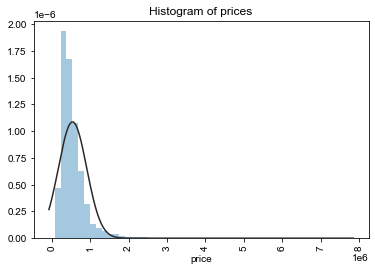

In [8]:
from scipy import stats

houses['price'].describe()
## histogram plot of price
#sns.distplot(houses['price'],fit=stats.laplace, kde=False)
sns.distplot(houses['price'],fit=stats.norm, kde=False)
sns.set(color_codes=True)
plt.xticks(rotation=90)
plt.title("Histogram of prices")

También realice un análisis de la relación entre los precios `price` y los precios por pie cuadrado del espacio de vivienda `sqft_living`. Utilice la función `lmplot()`de la librería `seaborn`.

¿Qué observa?

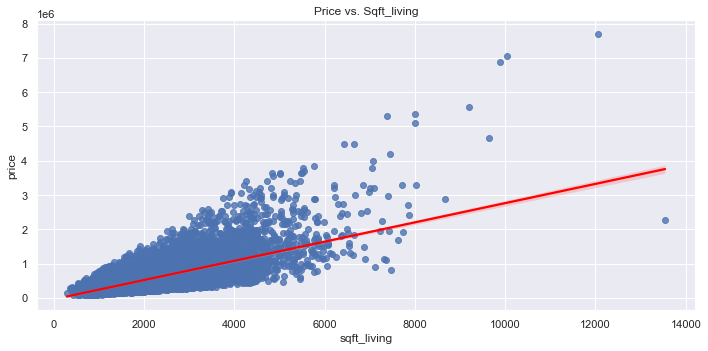

In [9]:
## linear relation between sqft_living and price
sns.lmplot(x='sqft_living',y='price',data=houses, 
           line_kws = {'color': "red"} ,aspect= 2)
plt.title("Price vs. Sqft_living");

¿Qué otras variables puede ver que son importantes para el precio? Realice un análisis de correlación.

## 2.1. Transformación de las variables

Como se pudo observar en el ejercicio anterior y como era de esperarse, la distribución de los precios no es tan cómoda para realizar inferencia. Es decir, dado que no tiene una distribución normal, podría tener problemas en la inferencia de los modelos. Por ello, en ocasiones se **transforman las variables** con el objetivo de evitar este problema y minimizar la varianza de los datos.

Las funciones típicas que se utilizan son:

* **Potencias:** elevar la variable al cuadrado, al cubo, aplicarle una raíz, entre otros, para problemas que probablemente impliquen una curva en su comportamiento.
* **Logaritmos:** aplicar el logaritmo (especialmente el logaritmo natural) para acercar los valores atípicos.
* **Funciones trigonométricas:** la aplicación de senos y cosenos para algunos problemas con comportamientos cíclicos. Este caso no se utiliza mucho.

### Pequeño ejercicio

Transforme la variable precios con un logaritmo natural. Utilice la función `np.log` para esto. Realice una gráfica de densidad para observar cómo cambió la distribución.

C:\Users\JM\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of prices')

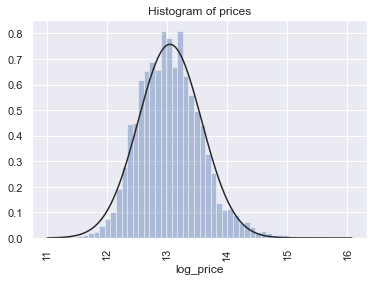

In [10]:
houses["log_price"] = np.log(houses["price"])

sns.distplot(houses['log_price'],fit=stats.norm, kde=False)
sns.set(color_codes=True)
plt.xticks(rotation=90)
plt.title("Histogram of prices")

Ahora hagampos una prueba formal:

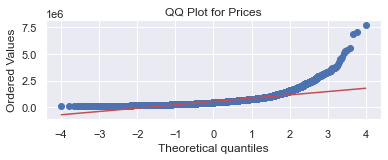

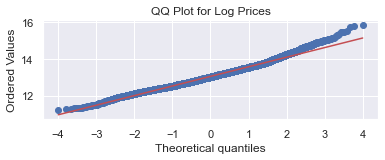

In [11]:
# Gráfica QQ Plot del precio
plt.subplot(2,1,1)
stats.probplot(houses['price'], dist = "norm", plot = plt)
plt.title("QQ Plot for Prices")
plt.show()

# Gráfica QQ Plot del logaritmo del precio
plt.subplot(2,1,1)
stats.probplot(np.log(houses['price']), dist = "norm", plot = plt)
plt.title("QQ Plot for Log Prices")
plt.show()

## 3. Construcción de un modelo lineal

## 3.1. Regresión univariada

Ahora que tenemos una mejor transformación de las variables, podemos observar cómo construir un modelo lineal. Por ahora, vamos a construir un modelo básico de una variable:

$$ log(price) \sim log(sqft_living) $$

Este modelo nos deja ver cómo se relacionan los pies cuadrados de la vivienda con el precio de la misma en términos logarítmicos.

In [12]:
mod1 = smf.ols(formula='np.log(price) ~ np.log(sqft_living)', data=houses).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.808e+04
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        18:25:24   Log-Likelihood:                -10240.
No. Observations:               21613   AIC:                         2.048e+04
Df Residuals:                   21611   BIC:                         2.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               6.7299    

¿Qué nos dice este modelo? Realicemos un análisis en palabras y uno matemático:

$$ log(P) = 0.84log(S) + 6.73 $$

Eso implica que, _ceteris paribus_, un aumento del 1% de los pies cuadrados en la vivienda, aumenta un 0.84% el precio de la vivienda. A esto se le conoce como **elasticidad**.

Ahora, las transformaciones tienen un efecto sobre las regresiones, veamos unos ejemplos:

<center><img src="log_lin.jpg" width = "750", height = "500"/></center>


## 3.2. Regresión multivariada

Ahora, no tenemos solo una variable: tenemos muchas, para este caso. Vamos a hacer una regresión del precio con el logaritmo de `sqft_living`, logaritmo de `sqft_lot`, `bedrooms`, `floors`, `bathrooms`, `watefront`, `condition`, `view`, `grade`, `yr_built`, `lat`y `long`.

### Pequeño ejercicio

Realice la regresión solicitada.

In [14]:
mod2 = smf.ols(formula='np.log(price) ~ sqft_living + np.log(sqft_lot) + bedrooms + floors + bathrooms + waterfront + condition + view + grade + yr_built + lat + long', data=houses).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     5720.
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        17:17:58   Log-Likelihood:                -1358.8
No. Observations:               21613   AIC:                             2744.
Df Residuals:                   21600   BIC:                             2847.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -36.6812      2.039  

Analicemos algunas relaciones.

## 3.3. ¿Cómo interpretar los resultados de un modelo lineal?

La tablas mostradas contienen bastante información, cuyos resultados debemos analizar. Nos enfocaremos en los siguientes:

### 3.3.1. Coeficientes

Los coeficientes nos indican cuál es el efecto de una variable independiente sobre la variable de interés. En ese sentido, recordemos la siguiente tabla:

<center><img src="log_lin.jpg" width = "750", height = "500"/></center>

Dependiendo si es un nivel (no tiene ninguna transformación) o si es un log (tiene una transformación logarítmica) podemos encontrar el efecto de una variable sobre otra. Algunos ejemplos son:

* Un cuarto adicional (`bedrooms`) está asociado a un efecto negativo de 1.26% en el precio de la vivienda, _ceteris paribus_. Esto es una transformación log - lin: $100*\beta \%$.
* Un aumento del 1% del metraje del lote (`sqft_lot`) está asociado a un efecto negativo de 0.01% del precio de la vivienda, _ceteris paribus_. Esto es una transformación log - log: $ \beta \%$.

Ahora, ¿qué significa el intercepto ($\beta_0$? En este caso, representa el _precio mínimo_ de la vivienda. Es decir, si todo fuera igual a cero, el precio básico de la vivienda sería igual al intercepto:  $\beta_0 = -36.68$.

### 3.3.2. p-valores

Los p-valores muestran ayudan a realizar siguiente prueba de hipótesis:

$$ H_0: \beta_1 = 0 $$
$$ H_1: \beta_1 \neq 0 $$

En ese sentido, los p-valores muestran la posición relativa del estimador que encontramos dentro de la distribución de los estimadores. En otras palabras _más simples_, nos indica un punto de comparación con el que podemos afirmar si existe evidencia estadística para decir si el estimador es significativo o no (para afirmar si existe evidencia de que la variable independiente es importante para la variable dependiente).

Para ello, hay diferentes puntos de comparación que podemos utilizar: $\alpha = 0.1$, $\alpha = 0.05$, $\alpha = 0.01$, entre otros. Por tanto, si $p-valor <= \alpha$, se dice que hay evidencia suficiente para indicar que la variable es significativa.

Cuanto más pequeño sea el nivel de significancia de comparación, más seguros estamos de ello. Sin embargo, el valor más utilizado es $\alpha = 0.05$.

### 3.3.3 R Cuadrado

El R Cuadrado es bastante importante para saber cómo se comporta nuestro modelo al explicar los datos. La fórmula del R-Cuadrado es la siguiente:

$$ R^2 = 1 - \frac{\mathrm{RSS}}{\mathrm{TSS}} $$

El RSS y el TSS denotan la Suma de Cuadrados Residuales y la Suma de Cuadrados Total. Esto, en otras palabras, nos dice **cuánto de los datos explica nuestro modelo**. Un mayor R Cuadrado y, aún más, un mayor R Cuadrado Ajustado es mejor.

> **Nota:** no se debe sacralizar el R Cuadrado. Todo depende del contexto.

En este sentido, el R-Cuadrado del modelo del pago vs. la edad es de $R-squared = 0.285$. En castellano, ello sugiere que el 28.5% de la variaci´pn de la variable dependiente es explicada por este modelo.

### 3.3.4. Residuales

Aunque no estén en la tabla, los residuales son elementos importantes en una regresión lineal. Estos son la diferencia entre el valor real y el valor predicho por el modelo, tal que

$$ u_i = Y_i - \hat{Y}_i $$

Los residuales permiten tener una inferencia adecuada en los modelos lineales. Hay que recordar que uno de los supuestos de este modelo es que **los residuales son identicatemente distribuidos normalmente**. Esto implica hasta cierto punto que los datos deben comportarse de manera normal. Sin embargo, esto no es enteramente cierto: los modelos aún pueden ser poderosos y útiles sin este supuesto.

Aún así, vale la pena echar un vistazo:

In [18]:
# Manual
resid_m = np.log(houses.price) - mod2.fittedvalues

# Con lm
resid_lm = mod2.resid

np.allclose(resid, resid_lm)

True

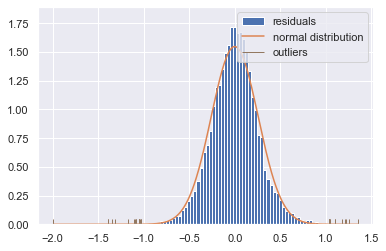

In [20]:
import scipy

# Hist de los residuales
plt.hist(mod2.resid, 
    density=True,                  
    bins=100,         
    label="residuals" #
    )

# Se plotean la distribución normal
xx = np.linspace(mod2.resid.min(), mod2.resid.max(), num=1000)
plt.plot(xx, scipy.stats.norm.pdf(xx, loc=0.0, scale=np.sqrt(mod2.scale)),
    label="normal distribution")
outliers = np.abs(mod2.resid)>4*np.sqrt(mod2.scale)

# Se separan los valores atípicos
sns.rugplot(mod2.resid[outliers],
            color="C5", # otherwise the rugplot has the same color as the histogram
            label="outliers")
plt.legend(loc="upper right");

#### Pequeño ejercicio

¿Tienen los residuales una distribución normal? Realice una prueba de ello.

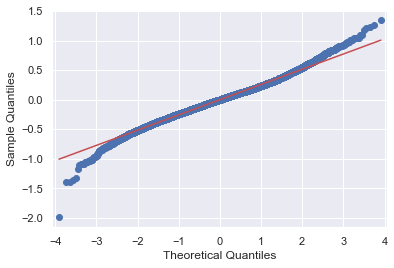

In [23]:
import statsmodels.api         as sm
sm.qqplot(mod2.resid, line="s");

## 3.5. Otras transformaciones

Ya observamos cómo la transformación de una variable nos ayuda a obtener un mejor modelo, en este caso una transformación logarítmica. Sin embargo, hay otras transformaciones que nos ayudan a entender mejor el problema y que no asumen la linearidad completa del modelo.

Algunas de otras estrategias son:

* Aplicar potencias en las variables.
* Realizar interacciones entre variables.

Vamos a ver un poco de ello:

In [26]:
houses['renovated'] = houses['yr_renovated'] >0

formula = ('np.log(price) ~ np.log(sqft_living)+ np.log(sqft_lot) + bedrooms + floors + bathrooms '
           '+ C(waterfront) + condition  + C(view) + grade + yr_built + lat + I(lat**2) '
           '+ long + C(zipcode)+ C(renovated)')
mod3 = smf.ols(formula=formula, data=houses).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     1833.
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        17:51:35   Log-Likelihood:                 6088.4
No. Observations:               21613   AIC:                        -1.200e+04
Df Residuals:                   21526   BIC:                        -1.131e+04
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -6003.8719 

In [27]:
## effect of a waterfront view different for houses that were recently renovated
formula = ('np.log(price) ~ np.log(sqft_living)*C(renovated) + np.log(sqft_lot) + bedrooms + floors + bathrooms '
           ' + condition + C(view) + grade + yr_built + lat*C(waterfront) + I(lat**2) '
           '+ long + C(zipcode)')
mod4 = smf.ols (formula=formula, data=houses).fit()
print(mod4.summary()) 

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1795.
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        17:51:47   Log-Likelihood:                 6111.7
No. Observations:               21613   AIC:                        -1.205e+04
Df Residuals:                   21524   BIC:                        -1.134e+04
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [29]:
print('The AIC of mod3 is ',mod3.aic)
print('The AIC of mod4 is ',mod4.aic)

The AIC of mod3 is  -12002.831432183819
The AIC of mod4 is  -12045.34250416782


## 4. Predicción con un modelo lineal

Ahora sí estamos listos para nuestro modelo de Machine Learning. Vamos a empezar con lo básico: la separación de los datos.

### 4.1. Set de entrenamiento y de testeo

Para realizar un buen modelo de ML, debemos procurar que el modelo aprenda bien y no _sobreaprenda_ con los datos que le entregamos y no se comporte bien con datos por fuera de los que tenemos. Esto se llama **_overfitting_**: un problema común en el que el modelo se comporta muy bien con los datos de entrenamiento, pero es pésimo con datos por fuera de ese set.

Para evitar ello, debemos separar los datos en un  set de entrenamiento y uno de testeo. Así, cuando evaluemos el modelo en la set de testeo, estaremos simulando que el modelo se está enfrentando con datos nuevos.

¡Vamos a separarlos!

In [31]:
np.random.seed(135568109) # Se planta una semilla para reproducibilidad

# Se obtiene el total de observaciones
ndata = len(houses)

# Se escoge de manera aleatoria 80% de los datos
idx_train = np.random.choice(range(ndata),int(0.8*ndata),replace=False)

# Se obtienen los índices de los datos no escogidos
idx_test  = np.asarray(list(set(range(ndata)) - set(idx_train)))

# Se separan
train     = houses.iloc[idx_train] # the training data set
test      = houses.iloc[idx_test]  # the test data set

# Miramos cuántas observaciones hay
print(train.shape) # 19,312 rows and 19 columns
print(test.shape)  #  4,829 rows and 19 columns


(17290, 23)
(4323, 23)


Ahora que tenemos los datos, vamos a entrenar el modelo:

In [32]:
mod2 = smf.ols(formula='np.log(price) ~ sqft_living + np.log(sqft_lot) + bedrooms + floors + bathrooms + waterfront + condition + view + grade + yr_built + lat + long', data=train).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     4570.
Date:                Tue, 31 May 2022   Prob (F-statistic):               0.00
Time:                        18:02:13   Log-Likelihood:                -1190.2
No. Observations:               17290   AIC:                             2406.
Df Residuals:                   17277   BIC:                             2507.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -37.3808      2.286  

### 4.2. Evaluación de modelos

Hay diferentes formas de evaluar modelos dependiendo si la variable de interés es una variable discontinua o continua. En este caso, tenemos una variable continua, por lo cual la precisión, el F1 Score, la especificidad y la sensibilidad se dejarán para más adelante. Por ahora, nos podemos concentrar en el Error Medio Absoluto (MAE), la Raíz del Error Medio Cuadrático (RMSE) y el porcentaje absoluto medio del error (MAPE).

A continuación están unas funciones que lo calculan:

In [33]:
# MAE
def MAE(prediction,true_values):
    return np.mean(                                                      # Mean
                np.abs(                                                   # Absolute
                        prediction-true_values                            # Error
                    )
                )

# RMSE
def RMSE(prediction,true_values):
    
    return np.sqrt(                                                          # Root
            np.mean(                                                      # Mean
                np.square(                                                # Squared
                         prediction-true_values                           # Error
                )
            )
        )

# MAPE
def MAPE(prediction,true_value):
    return np.mean(                                           # Mean
        np.abs(                                               # Absolute
               (prediction-true_value)/true_value             # Error
            )*100                                            # Percentage
    )

Matemáticamente, estas medidas se expresan de la siguiente manera:

\begin{eqnarray*}
    MAE &= \frac{1}{n} \sum_{i=1}^n \left| y_i - \hat{y}_i \right| \\
    RMSE &= \sqrt{ \frac{1}{n} \sum_{i=1}^n ( y_i - \hat{y}_i )^2 } \\
    MAPE &= 100\% \frac{1}{n} \sum_{i=1}^n \left|\frac{ y_i - \hat{y}_i}{y_i} \right|
\end{eqnarray*}

Ahora sí hagamos predicciones y comparemos con los valores reales:

In [38]:
mod_log = smf.ols(formula='np.log(price) ~ sqft_living + np.log(sqft_lot) + bedrooms + floors + bathrooms + waterfront + condition + view + grade + yr_built + lat + long', data=train).fit()

print("MAE between predictions of model_lin and true sale price:", MAE(mod_log.predict(test),np.log(test.price)))
print('----------------------')
print("RMSE between predictions of model_lin and true sale price:", RMSE(mod_log.predict(test),np.log(test.price)))
print('----------------------')
print("MAPE between predictions of model_lin and true sale price:", MAPE(mod_log.predict(test),np.log(test.price)))

MAE between predictions of model_lin and true sale price: 0.19376535934208594
----------------------
RMSE between predictions of model_lin and true sale price: 0.25153595781602384
----------------------
MAPE between predictions of model_lin and true sale price: 1.4840362109386398


Comparemos con otro modelo:

In [39]:
formula = ('np.log(price) ~ np.log(sqft_living)*C(renovated) + np.log(sqft_lot) + bedrooms + floors + bathrooms '
           ' + condition + C(view) + grade + yr_built + lat*C(waterfront) + I(lat**2) '
           '+ long + C(zipcode)')
mod_com = smf.ols (formula=formula, data=houses).fit()

print("MAE between predictions of model_lin and true sale price:", MAE(mod_com.predict(test),np.log(test.price)))
print('----------------------')
print("RMSE between predictions of model_lin and true sale price:", RMSE(mod_com.predict(test),np.log(test.price)))
print('----------------------')
print("MAPE between predictions of model_lin and true sale price:", MAPE(mod_com.predict(test),np.log(test.price)))

MAE between predictions of model_lin and true sale price: 0.13139588947291717
----------------------
RMSE between predictions of model_lin and true sale price: 0.17826856137942995
----------------------
MAPE between predictions of model_lin and true sale price: 1.0106012019683377
